In [1]:
from torchvision import models, transforms
from torchsummary import summary
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt


import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

from lib.src import *
from lib.utils import *

from pytorch_grad_cam import GradCAM, HiResCAM, AblationCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50


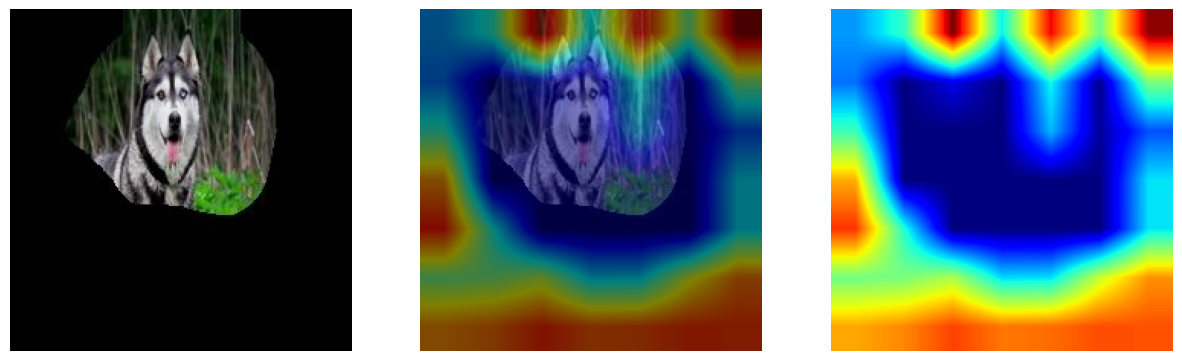

Softmax : 0.09872717410326004
Top 10 classes:
Siberian husky: 0.0987 (index: 250)
apron: 0.0764 (index: 411)
handkerchief: 0.0358 (index: 591)
diaper: 0.0315 (index: 529)
wall clock: 0.0306 (index: 892)
brassiere: 0.0301 (index: 459)
bib: 0.0269 (index: 443)
bath towel: 0.0244 (index: 434)
Eskimo dog: 0.0244 (index: 248)
mosquito net: 0.0234 (index: 669)


In [5]:
model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

image_path2 = 'images/del_husky_xgradcam_art2.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

cam_wombat = get_xgradcam(input_tensor2, model, model.layer4[-1].conv3, 892)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

model.eval()
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax : {out[0, 250].item()}")

output = model(input_tensor2.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")



In [7]:
X = [0.01, 0.05, 0.1, 0.25, 0.5]
CAM_X_AD = [0.025, 0.065, 0.109, 0.227, 0.373]
CAM_X_RIS = [0.387, 0.293, 0.239, 0.130, 0.056]

GRADCAM_X_AD =[0.062, 0.096, 0.120, 0.201, 0.379]
GRADCAM_X_RIS = [0.357, 0.306, 0.252, 0.179, 0.065]

HIRESCAM_X_AD = [0.043, 0.088, 0.144, 0.241, 0.388]
HIRESCAM_X_RIS = [0.401, 0.304, 0.226, 0.162, 0.063]

ABLATIONCAM_X_AD = [0.092, 0.076, 0.161, 0.290, 0.270]
ABLATIONCAM_X_RIS = [0.200, 0.400, 0.200, 0.000, 0.000]

XGRADCAM_X_AD = [0.172, 0.217, 0.257, 0.356, 0.444]
XGRADCAM_X_RIS = [0.187, 0.164, 0.105, 0.077, 0.029]

GRADCAMPLUSPLUS_X_AD = [0.098, 0.137, 0.156, 0.248, 0.383]
GRADCAMPLUSPLUS_X_RIS = [0.279, 0.206, 0.202, 0.135, 0.051]

SCORECAM_X_AD = [0.135, 0.291, 0.238, 0.449, 0.504]
SCORECAM_X_RIS = [0.0, 0.0, 0.0, 0.0, 0.0]

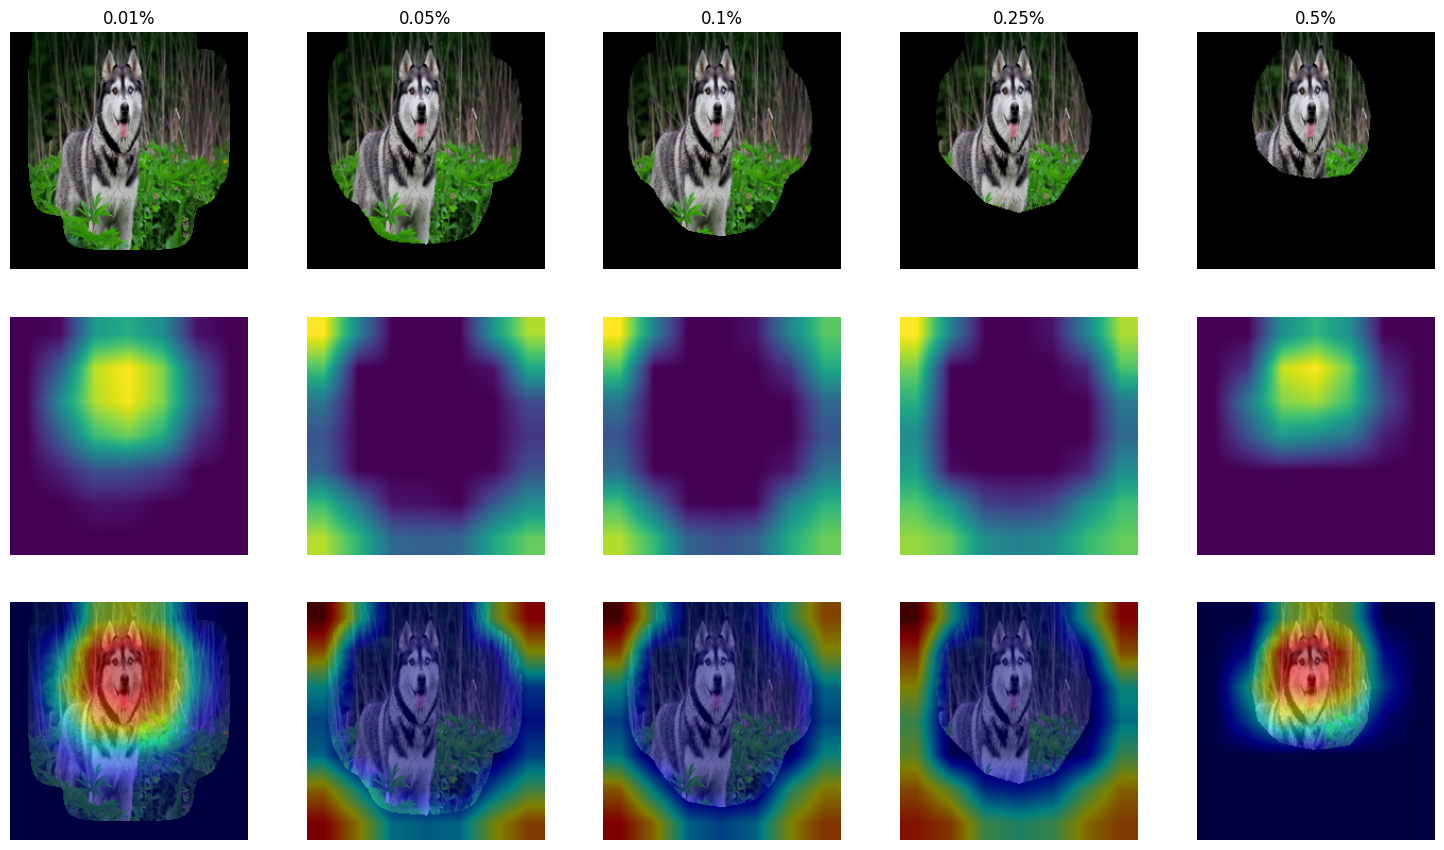

In [8]:
PERCENTAGES = [0.01, 0.05, 0.1, 0.25, 0.5]
MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CLASS = 250
FUNCTION = get_ablationcam
IMAGE = get_image_torch("images/husky.jpg", 224, 224)

fig, axs = plt.subplots(3, 5)
fig.set_size_inches(18.5, 10.5)


CAM = None

for i, percentage in enumerate(PERCENTAGES):
    if CAM is None:
        CAM = FUNCTION(IMAGE, MODEL, TARGET_LAYER, CLASS)
    IMG_DEL = delete_the_least_important_pixels(IMAGE, CAM, percentage)
    axs[0, i].imshow(IMG_DEL.permute(1, 2, 0))
    axs[0, i].axis('off')
    axs[0, i].set_title(f"{percentage}%")

    CAM_DEL = FUNCTION(IMG_DEL, MODEL, TARGET_LAYER, CLASS)

    CAM_DEL_TO_SHOW = cv2.resize(CAM_DEL, (224, 224))


    axs[1, i].imshow(CAM_DEL_TO_SHOW)
    axs[1, i].axis('off')

    IMG_OVERLAY_DEL = get_overlay(IMG_DEL, CAM_DEL, 0.5)
    axs[2, i].imshow(IMG_OVERLAY_DEL)
    axs[2, i].axis('off')

plt.savefig('pres/ablationcam.png')
plt.show()

c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Top 10 classes:
Siberian husky: 0.4359 (index: 250)
Eskimo dog: 0.3733 (index: 248)
malamute: 0.1502 (index: 249)
timber wolf: 0.0078 (index: 269)
dogsled: 0.0025 (index: 537)
schipperke: 0.0022 (index: 223)
tiger cat: 0.0021 (index: 282)
mosquito net: 0.0021 (index: 669)
white wolf: 0.0019 (index: 270)
dingo: 0.0014 (index: 273)


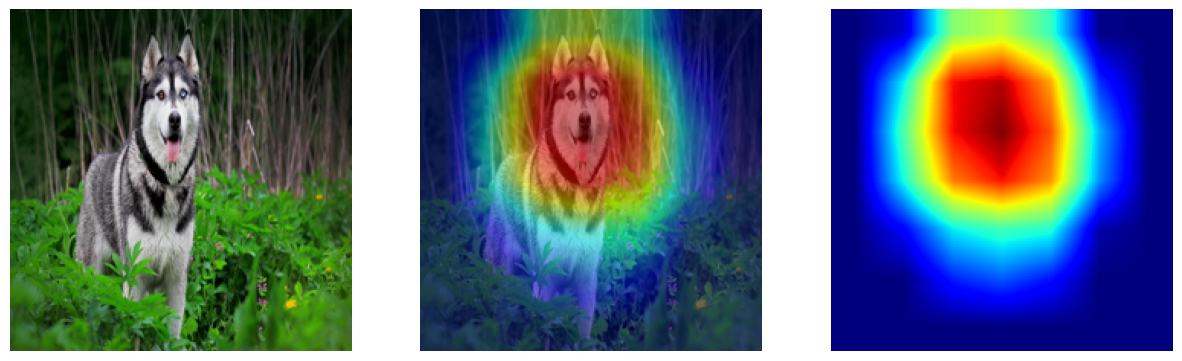

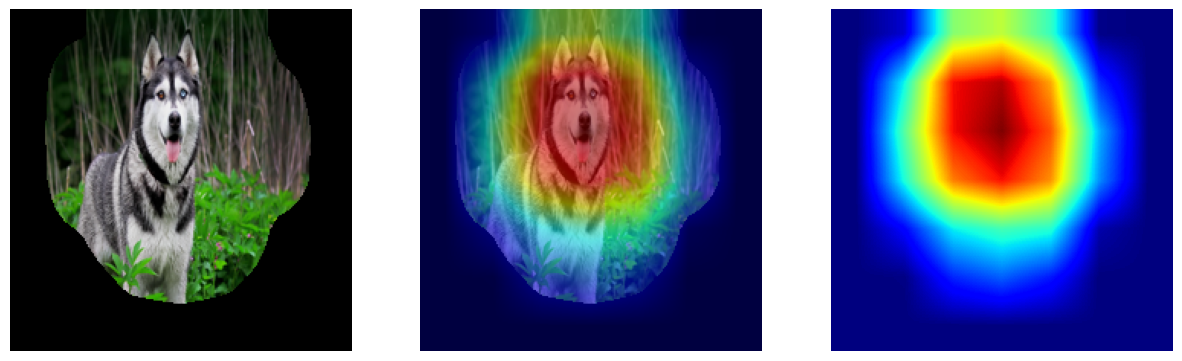

In [10]:

model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()
image_path = 'images/husky.jpg'
input_tensor = get_image_torch(image_path, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 250
cam_husky_lib = get_ablationcam(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

del_image = delete_the_least_important_pixels(input_tensor, cam_husky_lib, 0.1)
overlay_plot_torch(del_image, cam_husky_lib, 0.5)

del_image_np = del_image.permute(1, 2, 0).detach().cpu().numpy()
del_image_np = (del_image_np * 255).astype(np.uint8)
del_image_pil = Image.fromarray(del_image_np)
del_image_pil.save('images/del_husky_ablationcam_art.jpg')


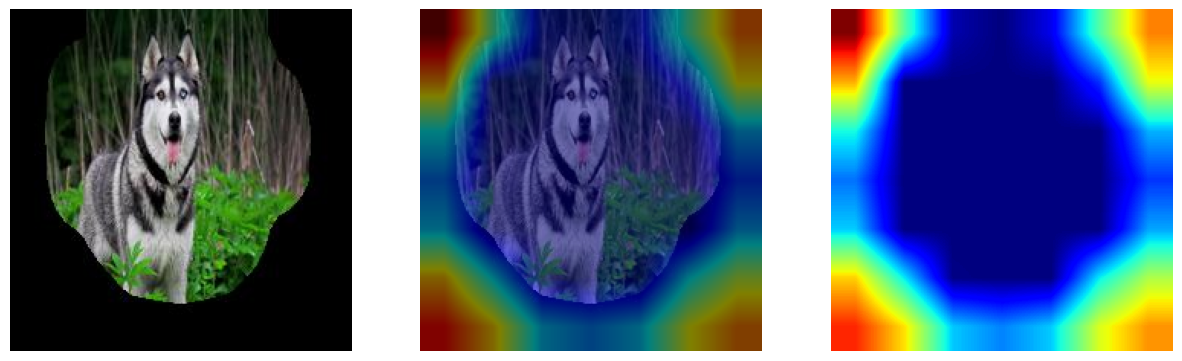

Softmax : 0.040106408298015594
Top 10 classes:
shower cap: 0.3526 (index: 793)
diaper: 0.1294 (index: 529)
Siberian husky: 0.0785 (index: 250)
apron: 0.0584 (index: 411)
paper towel: 0.0299 (index: 700)
Christmas stocking: 0.0270 (index: 496)
bib: 0.0258 (index: 443)
Eskimo dog: 0.0245 (index: 248)
brassiere: 0.0187 (index: 459)
bulletproof vest: 0.0174 (index: 465)


In [11]:
image_path2 = 'images/del_husky_ablationcam_art.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

cam_wombat = get_ablationcam(input_tensor2, model, model.layer4[-1].conv3, 250)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

model.eval()
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax : {out[0, 250].item()}")

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")



Top 10 classes:
Siberian husky: 0.4359 (index: 250)
Eskimo dog: 0.3733 (index: 248)
malamute: 0.1502 (index: 249)
timber wolf: 0.0078 (index: 269)
dogsled: 0.0025 (index: 537)
schipperke: 0.0022 (index: 223)
tiger cat: 0.0021 (index: 282)
mosquito net: 0.0021 (index: 669)
white wolf: 0.0019 (index: 270)
dingo: 0.0014 (index: 273)
Softmax dla klasy 250: 0.435878723859787


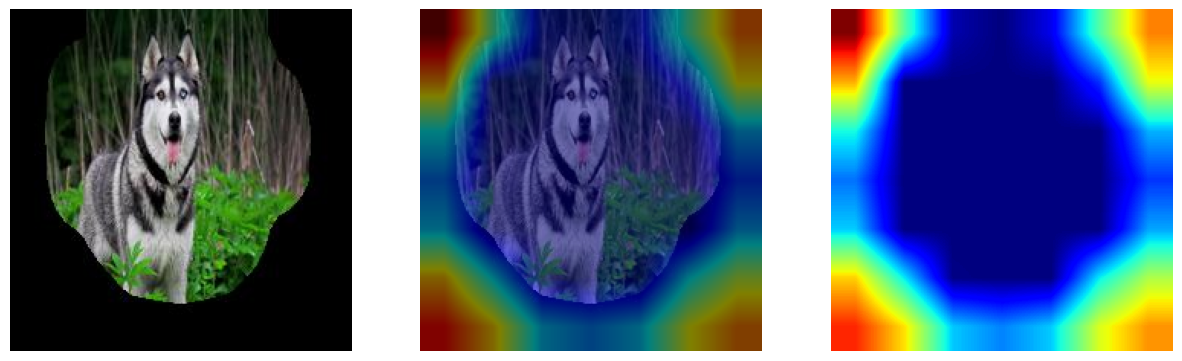

Softmax dla klasy 250 dla drugiego obrazu: 0.040106408298015594


In [13]:
from torchvision import models, transforms
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt

# Wczytanie modelu
model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

# Wczytanie obrazu
image_path = 'images/husky.jpg'
input_tensor = get_image_torch(image_path, 224, 224)

# Przetwarzanie obrazu przez model
output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

# Wczytanie nazw klas
class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

# Wyświetlenie top 10 klas
top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

# Obliczenie softmax dla klasy 250 (Siberian husky)
print(f"Softmax dla klasy 250: {probabilities[250].item()}")

# Wczytanie drugiego obrazu
image_path2 = 'images/del_husky_ablationcam_art.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

# Wybranie klasy 250 i wygenerowanie CAM dla drugiego obrazu
cam_wombat = get_ablationcam(input_tensor2, model, model.layer4[-1].conv3, 250)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

# Obliczenie softmax dla klasy 250 dla drugiego obrazu
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax dla klasy 250 dla drugiego obrazu: {out[0, 250].item()}")

Top 10 classes:
Siberian husky: 0.4359 (index: 250)
Eskimo dog: 0.3733 (index: 248)
malamute: 0.1502 (index: 249)
timber wolf: 0.0078 (index: 269)
dogsled: 0.0025 (index: 537)
schipperke: 0.0022 (index: 223)
tiger cat: 0.0021 (index: 282)
mosquito net: 0.0021 (index: 669)
white wolf: 0.0019 (index: 270)
dingo: 0.0014 (index: 273)
Softmax dla klasy 250: 0.37326157093048096


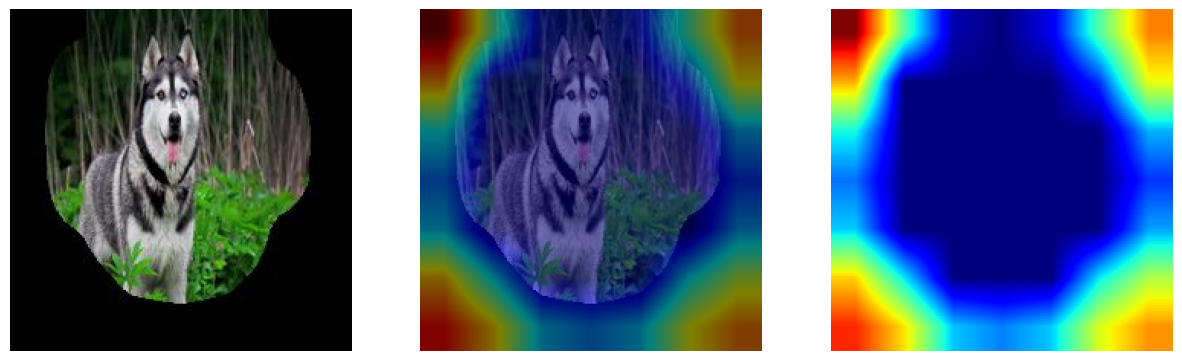

Softmax dla klasy 250 dla drugiego obrazu: 0.010282796807587147


In [14]:
from torchvision import models, transforms
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt

# Wczytanie modelu
model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()

# Wczytanie obrazu
image_path = 'images/husky.jpg'
input_tensor = get_image_torch(image_path, 224, 224)

# Przetwarzanie obrazu przez model
output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

# Wczytanie nazw klas
class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

# Wyświetlenie top 10 klas
top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

# Obliczenie softmax dla klasy 250 (Siberian husky)
print(f"Softmax dla klasy 250: {probabilities[248].item()}")

# Wczytanie drugiego obrazu
image_path2 = 'images/del_husky_ablationcam_art.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

# Wybranie klasy 250 i wygenerowanie CAM dla drugiego obrazu
cam_wombat = get_ablationcam(input_tensor2, model, model.layer4[-1].conv3, 248)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

# Obliczenie softmax dla klasy 250 dla drugiego obrazu
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax dla klasy 250 dla drugiego obrazu: {out[0, 248].item()}")